## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = '/Users/xiehuizhu/Downloads/2020ML/Day_004/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: /Users/xiehuizhu/Downloads/2020ML/Day_004/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
unique_house_type = list(app_train['HOUSETYPE_MODE'].unique())
print(unique_house_type)

['block of flats', nan, 'terraced house', 'specific housing']


In [4]:
sum(app_train['HOUSETYPE_MODE'].isna())

154297

In [5]:
unique_house_type.pop(1) # delete nan
print(unique_house_type)

['block of flats', 'terraced house', 'specific housing']


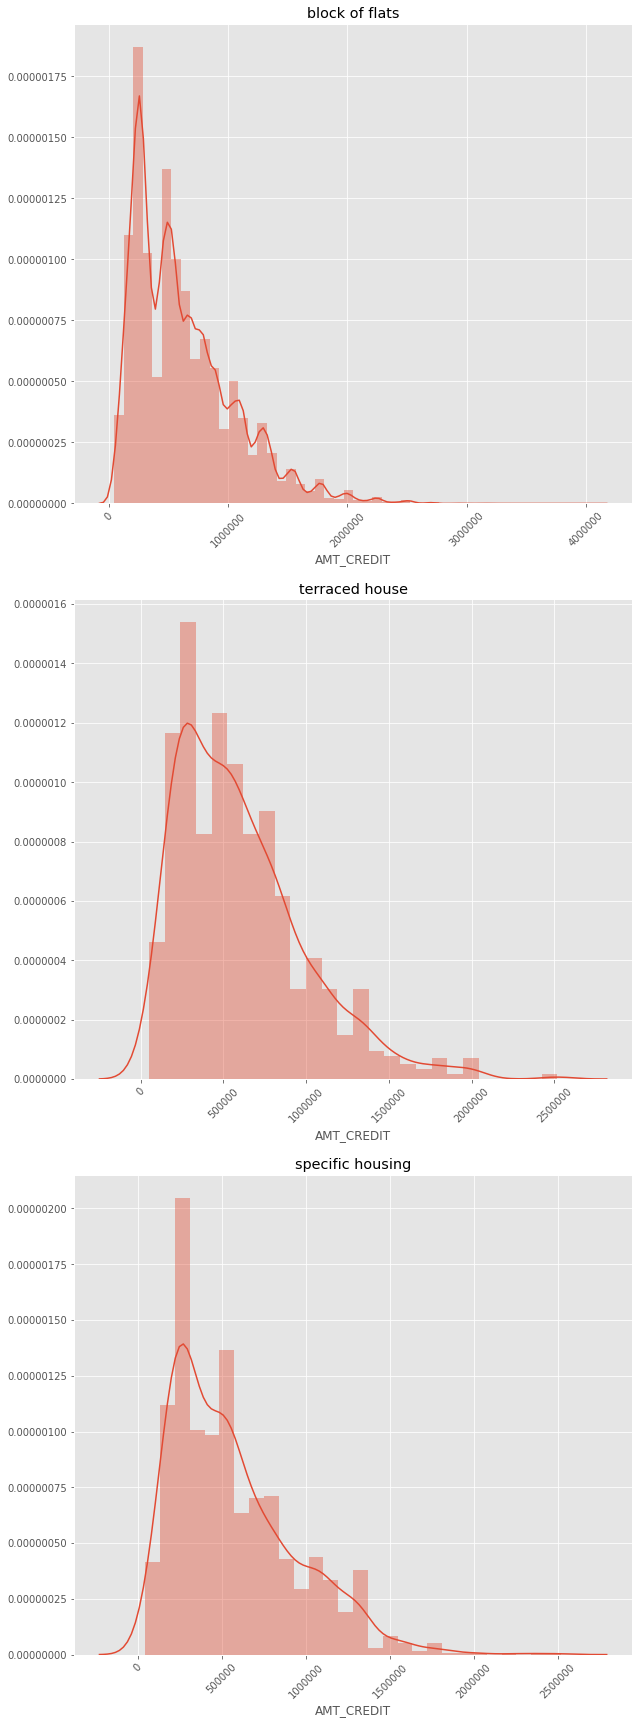

In [6]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版

nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i + 1)
    sns.distplot(app_train.loc[app_train['HOUSETYPE_MODE'] == unique_house_type[i], 'AMT_CREDIT'])
    plt.xticks(rotation = 45)
    plt.title(str(unique_house_type[i]))
plt.show()    